Ini adalah notebook untuk melakukan **Pemodelan Machine Learning**

# Reading Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Polandia/df_encode.csv')
df.head()

,payment_method,payment_status,promo_amount,promo_code,shipment_fee,total_amount,quantity,item_price,shipment_duration,event_name,traffic_source,is_churn
0,0,1,0,8,5000,1078709,3,357903,2,4,0,1
1,0,1,0,8,5000,1078709,3,357903,2,1,0,1
2,0,1,0,8,5000,1078709,3,357903,2,2,0,1
3,0,1,0,8,5000,1078709,3,357903,2,8,0,1
4,1,1,7255,0,10000,311231,1,308486,3,4,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4107637 entries, 0 to 4107636
Data columns (total 12 columns):
 #   Column             Dtype
---  ------             -----
 0   payment_method     int64
 1   payment_status     int64
 2   promo_amount       int64
 3   promo_code         int64
 4   shipment_fee       int64
 5   total_amount       int64
 6   quantity           int64
 7   item_price         int64
 8   shipment_duration  int64
 9   event_name         int64
 10  traffic_source     int64
 11  is_churn           int64
dtypes: int64(12)
memory usage: 376.1 MB


In [ ]:
df.isnull().any()

payment_method       False
payment_status       False
promo_amount         False
promo_code           False
shipment_fee         False
total_amount         False
quantity             False
item_price           False
shipment_duration    False
event_name           False
traffic_source       False
is_churn             False
dtype: bool

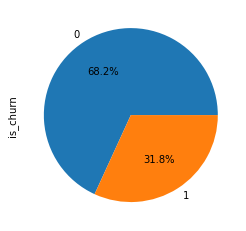

In [ ]:
df['is_churn'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# Machine Learning Models

In [ ]:
# Mengimport Library untuk membagi data train dan test dan melakukan perhitungan pemodelan
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [ ]:
X = df.drop(columns=['is_churn'])
y = df['is_churn']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

##Modeling and Acuracy

###Decision Tree


In [ ]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_predict_DT = DT.predict(X_test)
print('Decision Tree Accuracy : ', metrics.accuracy_score(y_test, y_predict_DT))
print(metrics.classification_report(y_test, y_predict_DT))

# Menyimpan hasil akurasi model
dt = metrics.accuracy_score(y_test, y_predict_DT)

Decision Tree Accuracy :  0.9222254141063969
              precision    recall  f1-score   support

           0       0.94      0.94      0.94    839687
           1       0.88      0.87      0.88    392605

    accuracy                           0.92   1232292
   macro avg       0.91      0.91      0.91   1232292
weighted avg       0.92      0.92      0.92   1232292



### Logistic Regession

In [ ]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
y_predict_LR = LR.predict(X_test)
print('Logistic Regression Accuracy : ', metrics.accuracy_score(y_test, y_predict_LR))
print(metrics.classification_report(y_test, y_predict_LR))

# Menyimpan hasil akurasi model
lr = metrics.accuracy_score(y_test, y_predict_LR)

Logistic Regression Accuracy :  0.6803363163925433
              precision    recall  f1-score   support

           0       0.68      1.00      0.81    839687
           1       0.35      0.00      0.01    392605

    accuracy                           0.68   1232292
   macro avg       0.52      0.50      0.41   1232292
weighted avg       0.58      0.68      0.55   1232292



### KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
y_predict_KNN = KNN.predict(X_test)
print('KNeighbors Accuracy : ', metrics.accuracy_score(y_test, y_predict_KNN))
print(metrics.classification_report(y_test, y_predict_KNN))

# Menyimpan hasil akurasi model
knn = metrics.accuracy_score(y_test, y_predict_KNN)

KNeighbors Accuracy :  0.9817267335988548
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    839687
           1       0.98      0.96      0.97    392605

    accuracy                           0.98   1232292
   macro avg       0.98      0.98      0.98   1232292
weighted avg       0.98      0.98      0.98   1232292



### Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_predict_GNB = GNB.predict(X_test)
print('Gaussian NB Accuracy : ', metrics.accuracy_score(y_test, y_predict_GNB))
print(metrics.classification_report(y_test, y_predict_GNB))

# Menyimpan hasil akurasi model
gnb = metrics.accuracy_score(y_test, y_predict_GNB)

Gaussian NB Accuracy :  0.6741308066594606
              precision    recall  f1-score   support

           0       0.68      0.97      0.80    839687
           1       0.39      0.04      0.07    392605

    accuracy                           0.67   1232292
   macro avg       0.53      0.50      0.44   1232292
weighted avg       0.59      0.67      0.57   1232292



### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

RF = RandomForestClassifier(n_estimators=50)
RF.fit(X_train, y_train)
y_predict_RF = RF.predict(X_test)
print('Random Forest Accuracy : ', metrics.accuracy_score(y_test, y_predict_RF))
print(metrics.classification_report(y_test, y_predict_RF))

# Menyimpan hasil akurasi model
rf = metrics.accuracy_score(y_test, y_predict_RF)

Random Forest Accuracy :  0.9216265300756639
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    839687
           1       0.90      0.84      0.87    392605

    accuracy                           0.92   1232292
   macro avg       0.92      0.90      0.91   1232292
weighted avg       0.92      0.92      0.92   1232292



### Gradient Boosting Classifier

In [ ]:
GB = GradientBoostingClassifier(n_estimators=20)
GB.fit(X_train, y_train)
y_predict_GB = GB.predict(X_test)
print('Gradient Boosting Accuracy : ', metrics.accuracy_score(y_test, y_predict_GB))
print(metrics.classification_report(y_test, y_predict_GB))

# Menyimpan hasil akurasi model
gb = metrics.accuracy_score(y_test, y_predict_GB)

Gradient Boosting Accuracy :  0.694467707329107
              precision    recall  f1-score   support

           0       0.70      0.96      0.81    839687
           1       0.60      0.13      0.21    392605

    accuracy                           0.69   1232292
   macro avg       0.65      0.54      0.51   1232292
weighted avg       0.67      0.69      0.62   1232292



### Extra Trees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ET = ExtraTreesClassifier(n_estimators=50)
ET.fit(X_train, y_train)
y_predict_ET = ET.predict(X_test)
print('Extra Trees Accuracy : ', metrics.accuracy_score(y_test, y_predict_ET))
print(metrics.classification_report(y_test, y_predict_ET))

# Menyimpan hasil akurasi model
et = metrics.accuracy_score(y_test, y_predict_ET)

Extra Trees Accuracy :  0.9217977557267271
              precision    recall  f1-score   support

           0       0.93      0.96      0.94    839687
           1       0.90      0.85      0.87    392605

    accuracy                           0.92   1232292
   macro avg       0.92      0.90      0.91   1232292
weighted avg       0.92      0.92      0.92   1232292



# Perbandingan Akurasi Model

In [ ]:
nama_model = ['Decision Tree Classifier','Logistic Regression','KNeighbors Classifier','Gaussian NB','Random Forest Classifier','Gradient Boosting Classifier','Extra Trees Classifier']
akurasi = [dt,lr,knn,gnb,rf,gb,et]

tm = pd.DataFrame({'Nama Model': nama_model, "Akurasi" : akurasi})
tm

,Nama Model,Akurasi
0,Decision Tree Classifier,0.922225
1,Logistic Regression,0.680336
2,KNeighbors Classifier,0.981727
3,Gaussian NB,0.674131
4,Random Forest Classifier,0.921627
5,Gradient Boosting Classifier,0.694468
6,Extra Trees Classifier,0.921798


In [ ]:
tm.sort_values(by=['Akurasi'], ascending=False)

,Nama Model,Akurasi
2,KNeighbors Classifier,0.981727
0,Decision Tree Classifier,0.922225
6,Extra Trees Classifier,0.921798
4,Random Forest Classifier,0.921627
5,Gradient Boosting Classifier,0.694468
1,Logistic Regression,0.680336
3,Gaussian NB,0.674131


Hasil pemodelan dengan akurasi tinggi dan f1-score yang baik ialah pada model KNN, Random Forest, dan Extra Trees. Maka pengujian data test yang tidak diberi sample untuk diprediksi menggunakan ketiga model tersebut, untuk mendapatkan model mana yangg terbaik.